# **Exploratory Data Analysis on Wine Quality**
### Author: Jennifer Nguyen

In [125]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Loading Dataset:

In [126]:
df = pd.read_csv('winequality.csv')
pythonCopydf = df.copy()

# Handle missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Display Basic Information and Label Wine Quality

In [127]:
# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

# Wine quality labels
pythonCopydf['wine_quality_label'] = df['quality'].apply(lambda x: 'Good' if x > 5 else 'Bad')
pythonCopydf['wine_quality_label_all'] = 'All'

# x plot: Label for wine quality and all
labels = pd.concat([pythonCopydf['wine_quality_label'], pythonCopydf['wine_quality_label_all']])

# Compute correlations matrix for each pair of attributes 
correlation_matrix = df.corr()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
<class 'pandas.core.frame.Da

---

# **Step 1: Compute and Plot Correlation Matrix**

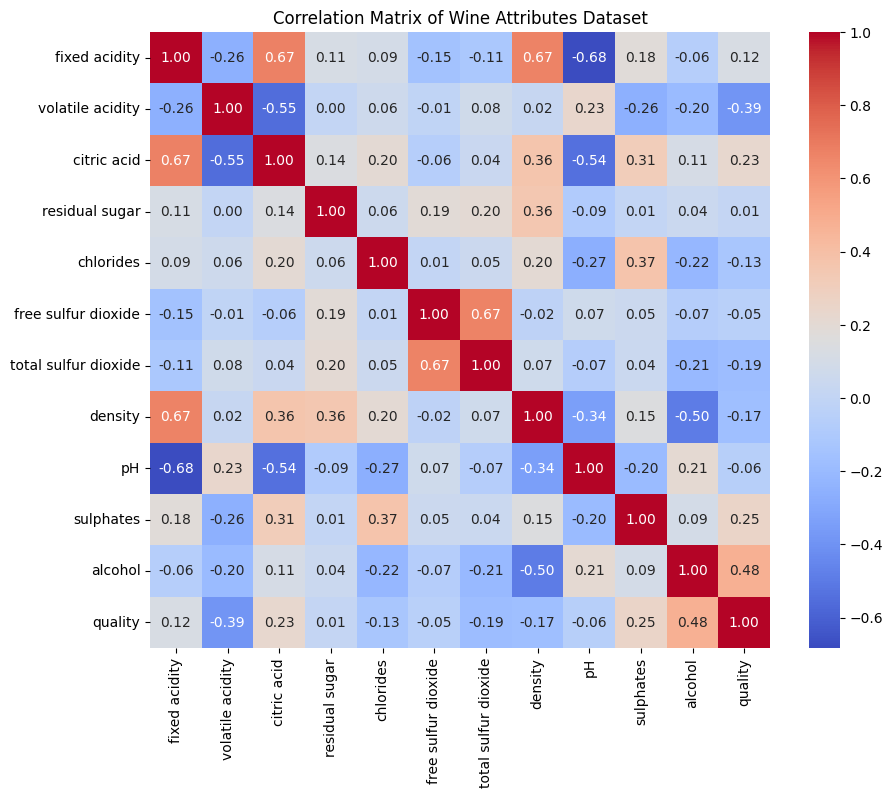

In [128]:
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Attributes Dataset')
plt.show()

---

# **Step 2-4: Scatterplots for the Following Attributes**
### **First Scatterplot:** Alcohol vs pH

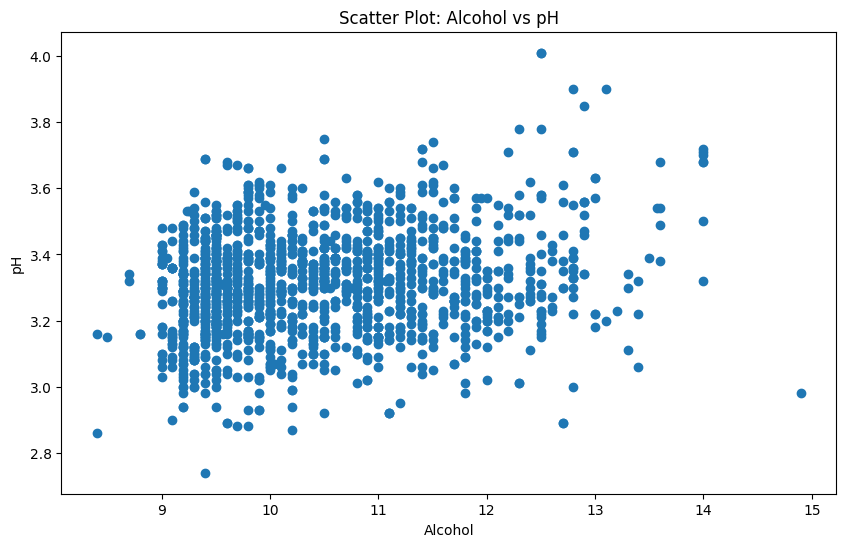

In [129]:
# Scatterplot for alcohol and pH
plt.figure(figsize=(10, 6))
plt.scatter(df['alcohol'], df['pH'])
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Scatter Plot: Alcohol vs pH')
plt.show()

### **Second Scatterplot:** Residual Sugar vs pH

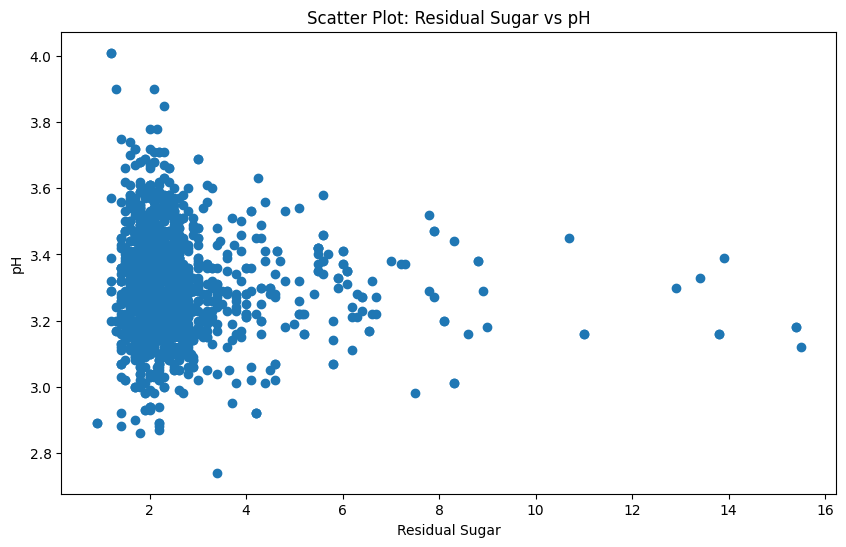

In [130]:

# Scatteplot for residual sugar and pH
plt.figure(figsize=(10, 6))
plt.scatter(df['residual sugar'], df['pH'])
plt.xlabel('Residual Sugar')
plt.ylabel('pH')
plt.title('Scatter Plot: Residual Sugar vs pH')
plt.show()

### **Third Scatterplot:** Fixed Acidity and Citric Acid

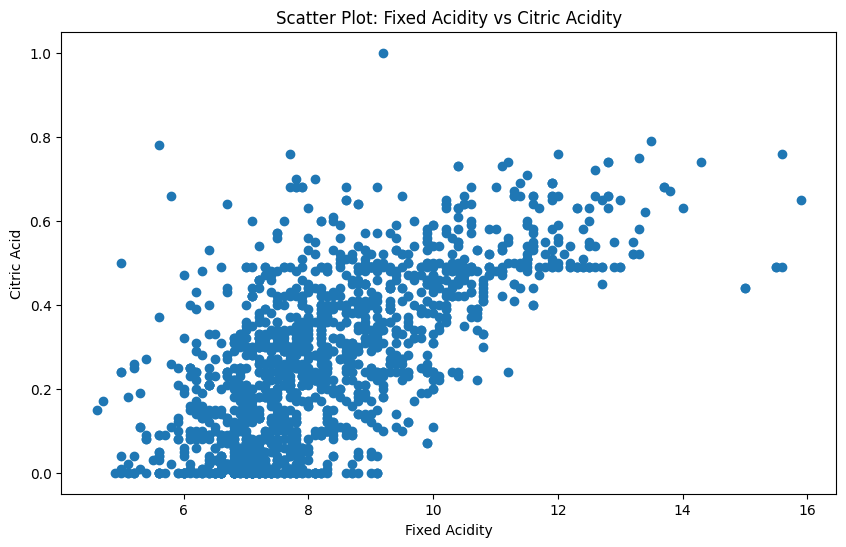

In [131]:

# Scatterplot for fixed acidity and citric acid
plt.figure(figsize=(10, 6))
plt.scatter(df['fixed acidity'], df['citric acid'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.title('Scatter Plot: Fixed Acidity vs Citric Acidity')
plt.show()

---

# **Step 5: Histogram of Quality Attribute**

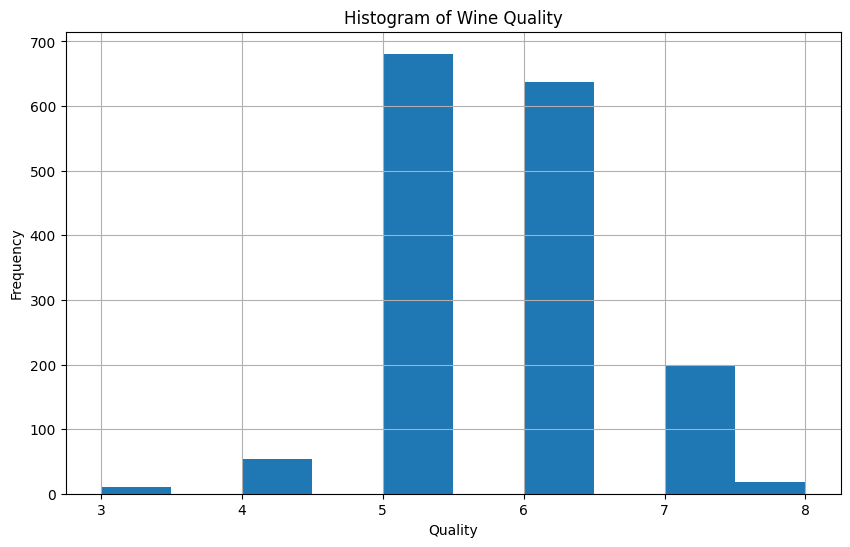

In [132]:
# Histogram of quality attribute
plt.figure(figsize=(10, 6))
df['quality'].hist(bins=10)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality')
plt.show()

---

# **Step 6-7: Box Plots for Alcohol and pH Attributes by Wine Quality Classes**
### **First Box Plot:** Alcohol

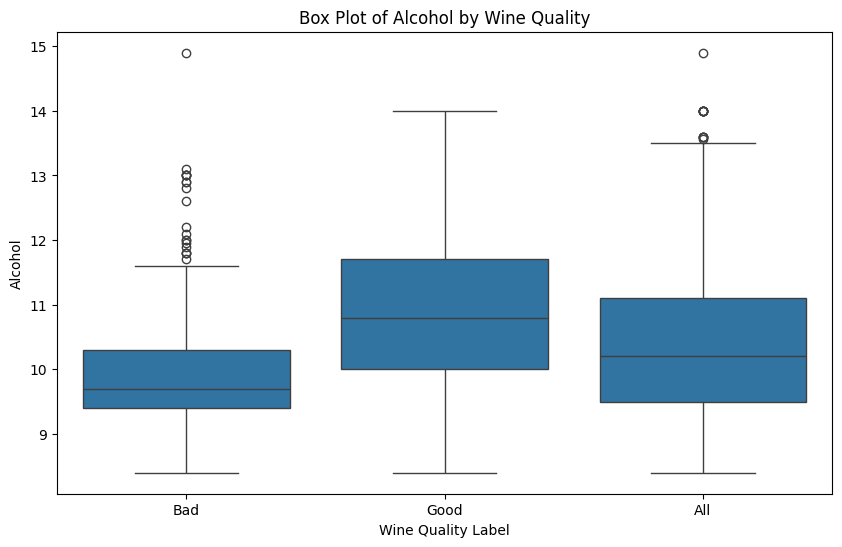

In [133]:
# y plot: Combine alcohol data into one series
alcohol_data = pd.concat([pythonCopydf['alcohol'], pythonCopydf['alcohol']])

# Box plot for alcohol attribute 
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels, y=alcohol_data)
plt.title('Box Plot of Alcohol by Wine Quality')
plt.xlabel('Wine Quality Label')
plt.ylabel('Alcohol')
plt.show()

### **Second Box Plot:** pH

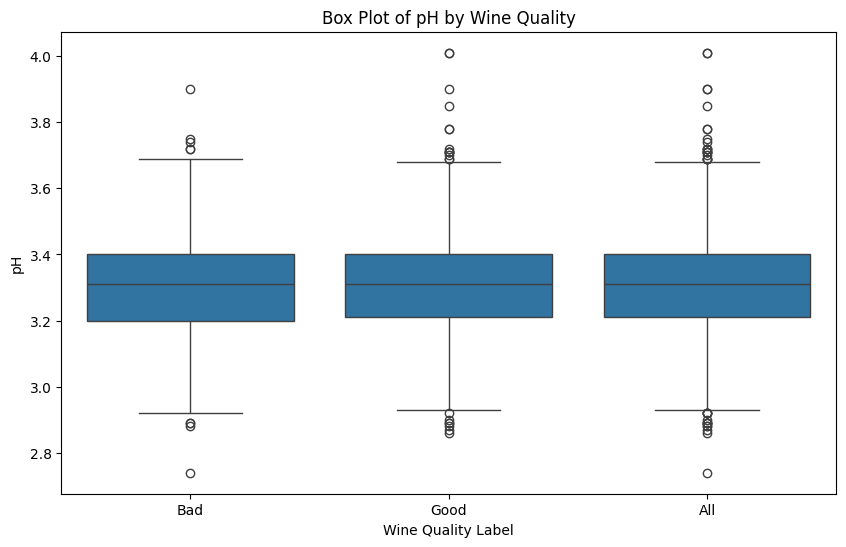

In [134]:
# y plot: combing pH data into one series
pH_data = pd.concat([pythonCopydf['pH'], pythonCopydf['pH']])

# Box plot for pH attribute
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels, y=pH_data)
plt.title('Box Plot of pH by Wine Quality')
plt.xlabel('Wine Quality Label')
plt.ylabel('pH')
plt.show()


---

# **Step 8: Supervised Scatter Plots for 3 Pairs of Attributes with Respect to Quality**
### **First Supervised Scatter Plot:** Alcohol vs pH

In [135]:
# Create color palette for the Quality class variable
palette = sns.color_palette("plasma", as_cmap=True)

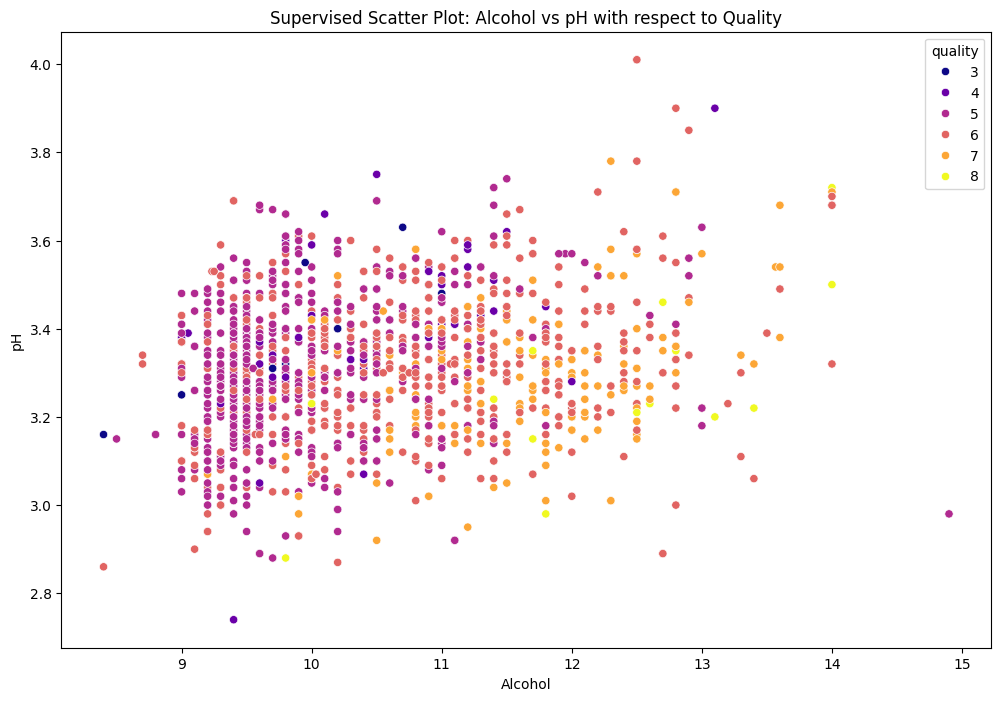

In [136]:
# Supervised scatter plot: Alcohol vs pH with respect to Quality
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='alcohol', y='pH', hue='quality', palette=palette, legend='full')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Supervised Scatter Plot: Alcohol vs pH with respect to Quality')
plt.show()

### **Second Supervised Scatter Plot:** Residual Sugar vs pH

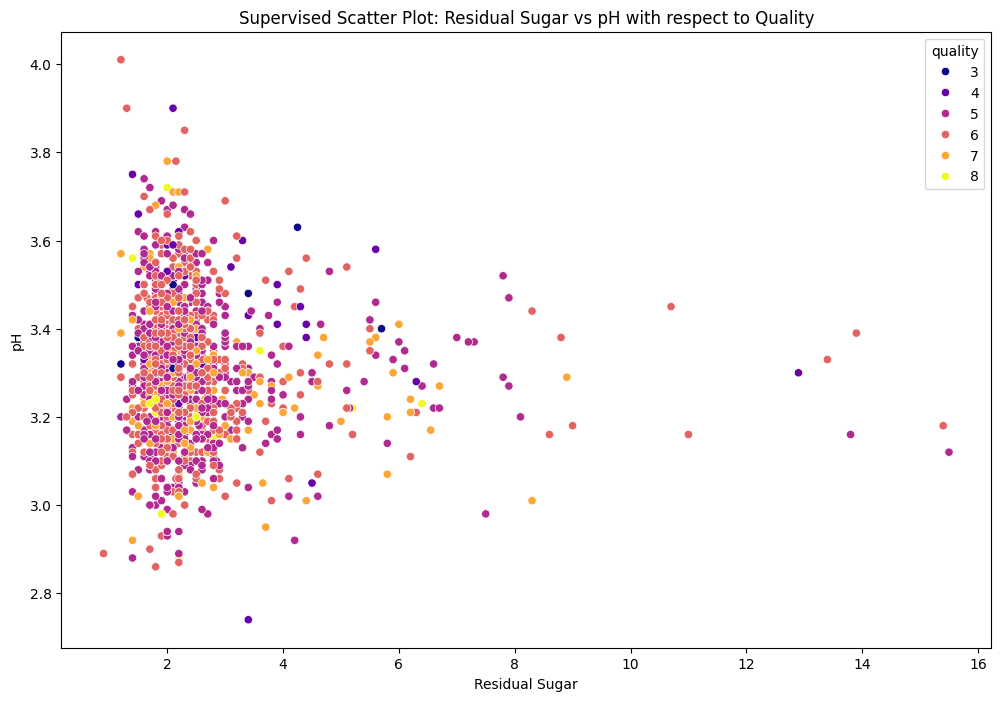

In [137]:
# Supervised scatter plot: Residual Sugar vs pH with respect to Quality
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='residual sugar', y='pH', hue='quality', palette=palette, legend='full')
plt.xlabel('Residual Sugar')
plt.ylabel('pH')
plt.title('Supervised Scatter Plot: Residual Sugar vs pH with respect to Quality')
plt.show()

### **Third Supervised Scatter Plot:** Fixed Acidity vs Free Sulfur Dioxide

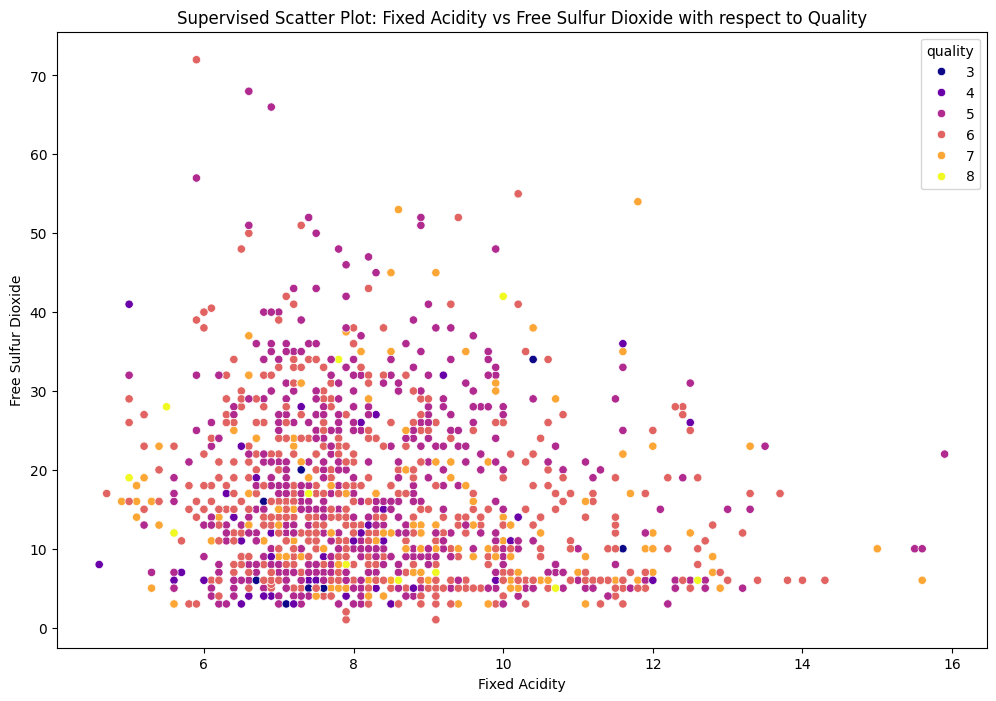

In [138]:
# Supervised scatter plot: Fixed Acidity vs Free Sulfur Dioxide with respect to Quality
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='fixed acidity', y='free sulfur dioxide', hue='quality', palette=palette, legend='full')
plt.xlabel('Fixed Acidity')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Supervised Scatter Plot: Fixed Acidity vs Free Sulfur Dioxide with respect to Quality')
plt.show()

---

# **Step 9: PCA on all the attributes**
### **First Scatterplot:** PCA without normalization

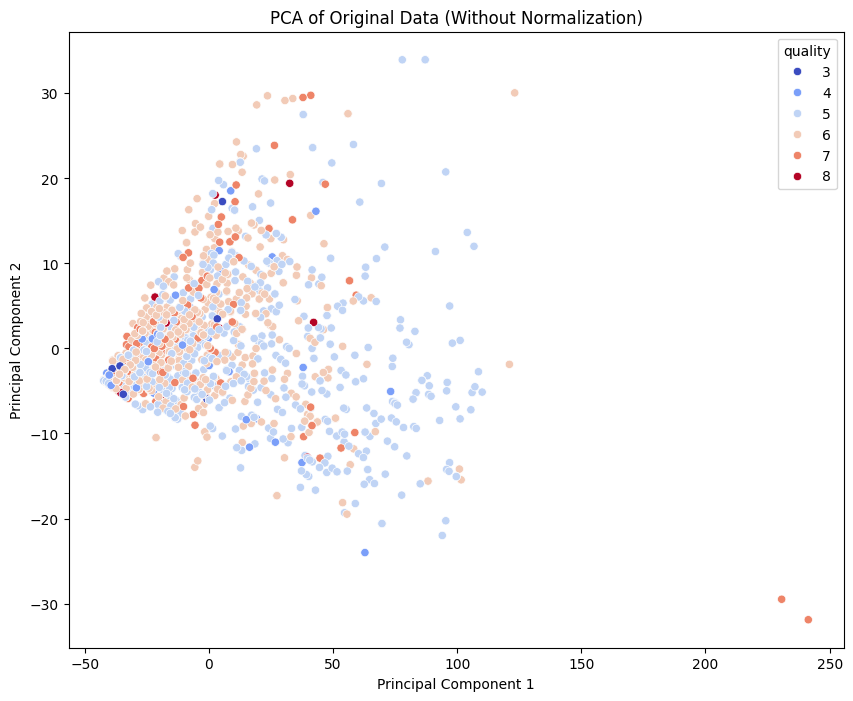

In [142]:
# Drop class variable
X = df.drop(columns=['quality']) 

# Perform PCA on original data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Create scatter plot of first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['quality'], palette='coolwarm')
plt.title('PCA of Original Data (Without Normalization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **Second Scatterplot:** PCA with Z-score normalization  

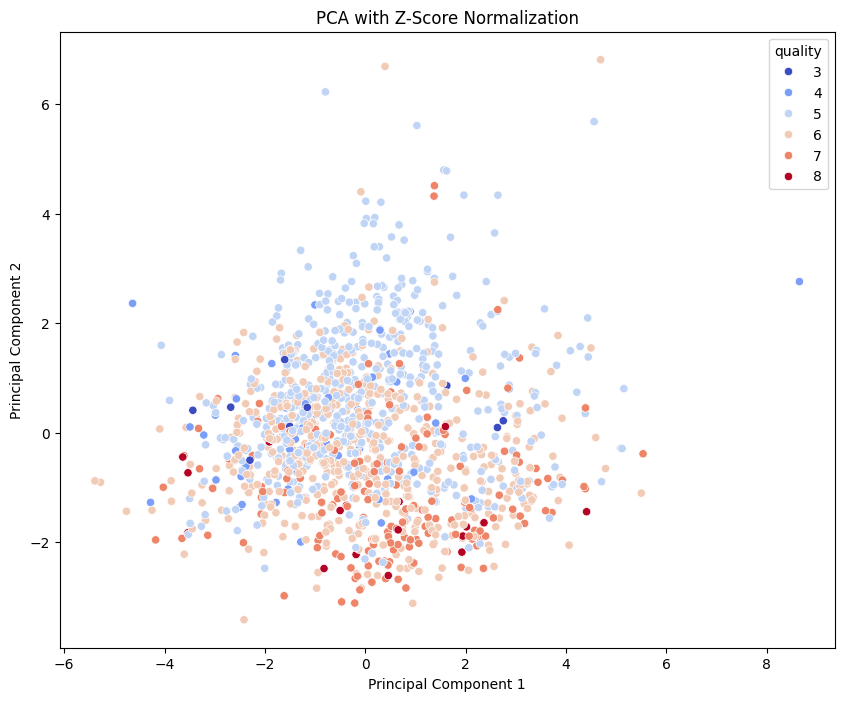

In [144]:
scaler = StandardScaler()
X_scaled_zscore = scaler.fit_transform(X)

# Perform PCA on Z-Score normalized data
pca_zscore = PCA(n_components=2)
pca_components_zscore = pca_zscore.fit_transform(X_scaled_zscore)

# Create scatter plot of first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components_zscore[:, 0], y=pca_components_zscore[:, 1], hue=df['quality'], palette='coolwarm')
plt.title('PCA with Z-Score Normalization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **Second Scatterplot:** PCA with Min-Max normalization  

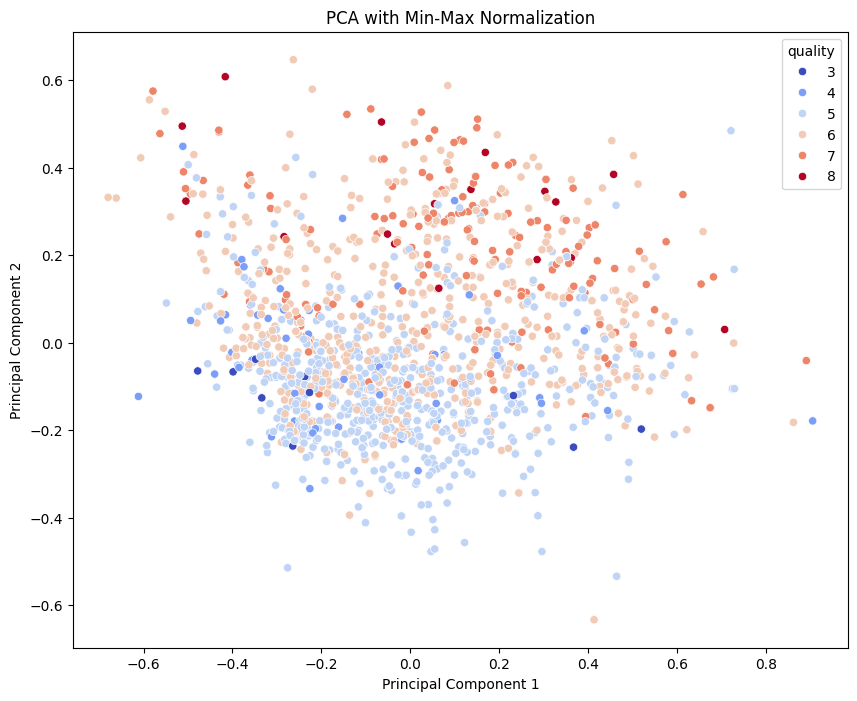

In [143]:
scaler = MinMaxScaler()
X_scaled_minmax = scaler.fit_transform(X)

# Perform PCA on Min-Max normalized data
pca_minmax = PCA(n_components=2)
pca_components_minmax = pca_minmax.fit_transform(X_scaled_minmax)

# Create scatter plot of first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components_minmax[:, 0], y=pca_components_minmax[:, 1], hue=df['quality'], palette='coolwarm')
plt.title('PCA with Min-Max Normalization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
